In [59]:
library(datasets)
library(graphics)
library(grDevices)
#library(lme4)
#library(lmerTest)
#library(car)
#library(carData)
#library(multcomp)
#library(lsmeans)
library(MASS)
library(ggplot2)
library(methods)
library(Matrix)
#library(multcomp)
#library(mvtnorm)
library(stats)
library(survival)
#library(TH.data)
library(utils)
library(readr)
library(WRS2)
#library(pgirmess)

In [60]:
#install.packages("pgirmess")

In [61]:
data = read_csv('AA2_Avoid_Motor_Final_28_subjcts.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_integer(),
  Cluster_avoid_cutoff_55 = col_integer(),
  Cluster_hierarc_method_complet = col_integer(),
  Perf_Group = col_integer(),
  Order = col_integer(),
  Last6Total = col_integer(),
  STAI_T = col_integer(),
  BIS = col_integer(),
  AllAR = col_integer(),
  STAIS_Group = col_integer(),
  BIS_Group = col_integer(),
  ID2 = col_integer(),
  STAIT_Groups = col_integer(),
  BISMedian_Group = col_integer(),
  VAR00006 = col_integer(),
  AR_Group = col_integer(),
  Age = col_integer(),
  Ancestry = col_integer(),
  Sex = col_integer(),
  Marital_Status = col_integer()
  # ... with 99 more columns
)
See spec(...) for full column specifications.


In [62]:
#colnames(data)

In [63]:
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==1]<-'good learners'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==2]<-'stable intermediate'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==3]<-'stable hyperavoiders'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==4]<-'stable hypo-avoiders'

data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==1]<- 'stable HyperAvoiders'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==2]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==3]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==4]<- 'stable hypo-avoiders' 
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==5]<-'stable hypo-avoiders'

Warning message:
“Unknown or uninitialised column: 'Avoidance_clusters'.”

In [64]:
data <- data[!(is.na(data$Avoidance_clusters)), ]
data$Avoidance_clusters <- as.factor(data$Avoidance_clusters)

# ANXIETY

## State anxiety


	Kruskal-Wallis rank sum test

data:  data$STAI_S by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.91701, df = 2, p-value = 0.6322


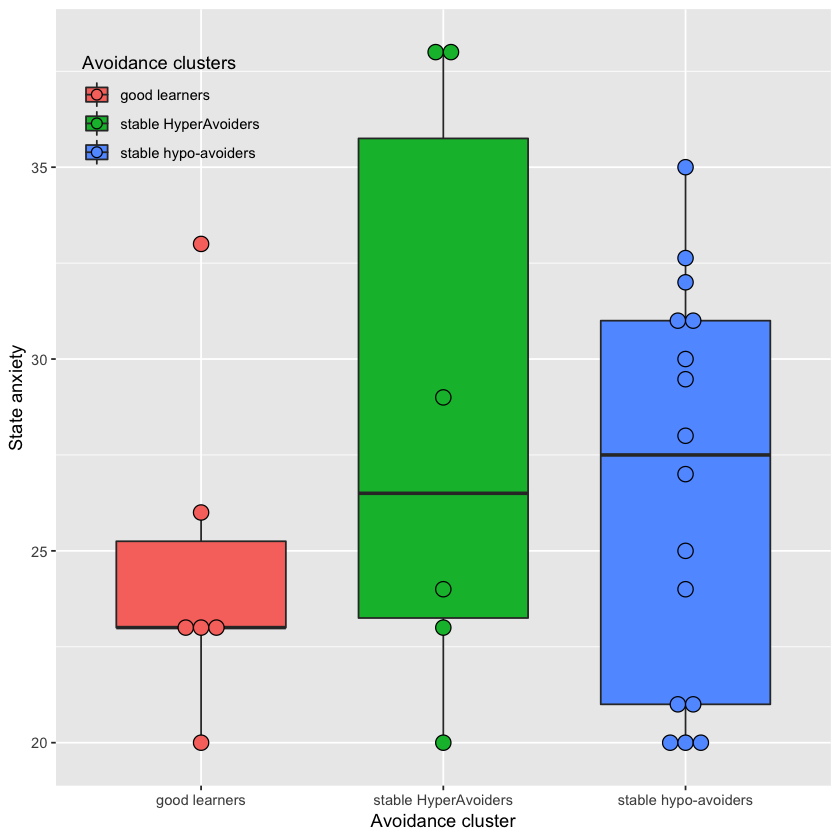

In [65]:
kruskal.test(data$STAI_S ~ data$Avoidance_clusters)

StaiSBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_S,
                                    fill=Avoidance_clusters))
StaiSBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="State anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Trait anxiety


	Kruskal-Wallis rank sum test

data:  data$STAI_T by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.35114, df = 2, p-value = 0.839


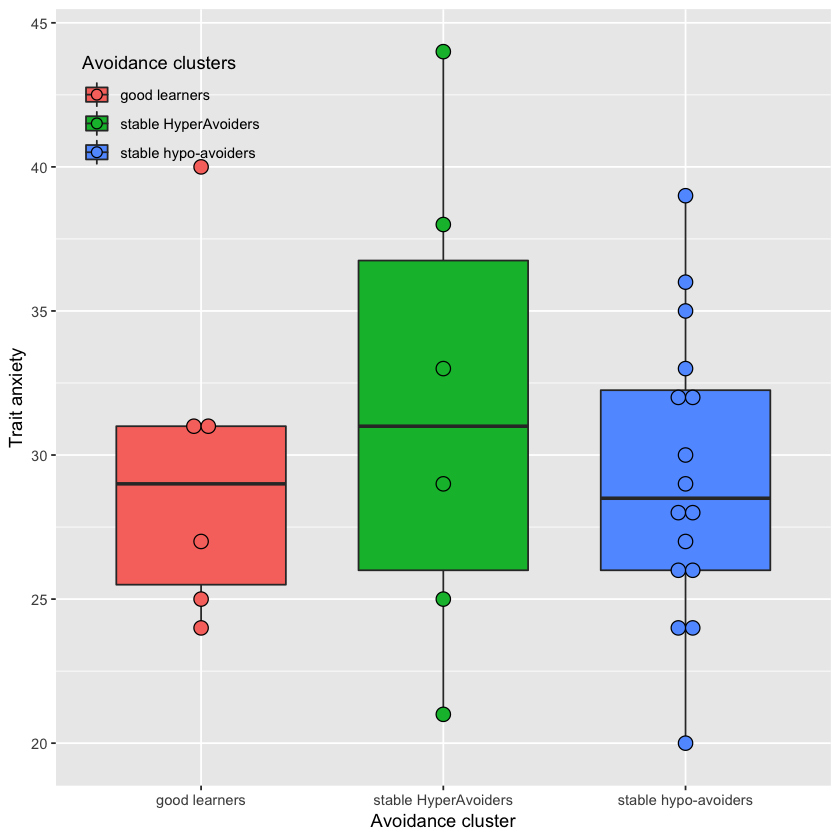

In [66]:
kruskal.test(data$STAI_T ~ data$Avoidance_clusters)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_T,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center") +
    labs(x="Avoidance cluster", y="Trait anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Anxiety right before the task


	Kruskal-Wallis rank sum test

data:  data$VAS_Pre by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.9371, df = 2, p-value = 0.0189


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

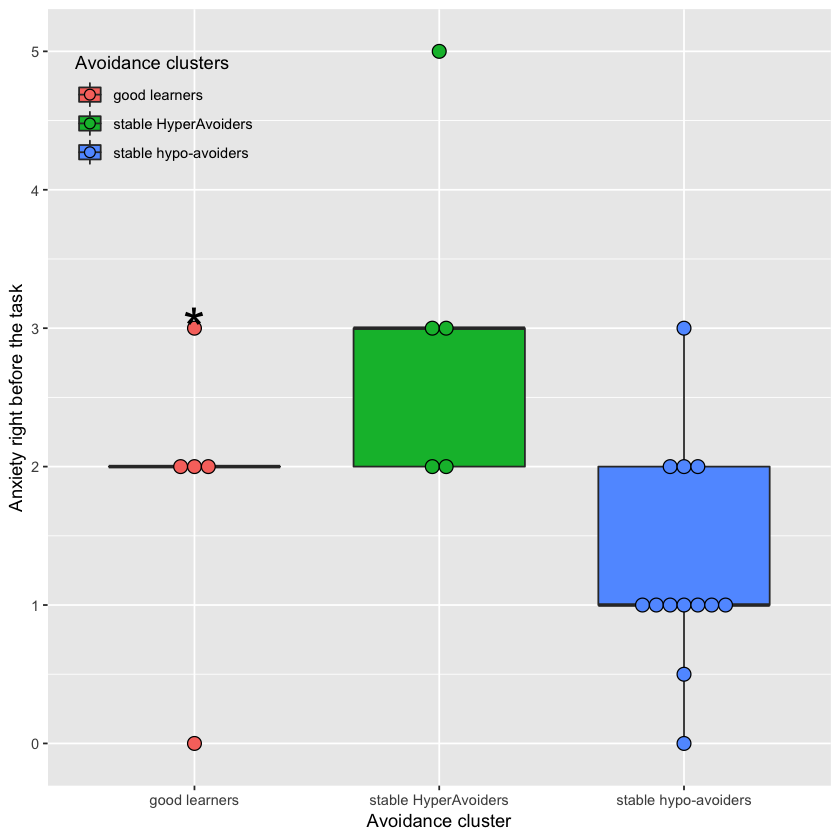

In [67]:
kruskal.test(data$VAS_Pre ~ data$Avoidance_clusters)
#kruskalmc

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Pre,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right before the task") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=3, label="*", size=12)

## Anxiety over the task


	Kruskal-Wallis rank sum test

data:  data$VAS_Task by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 3.4425, df = 2, p-value = 0.1788


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

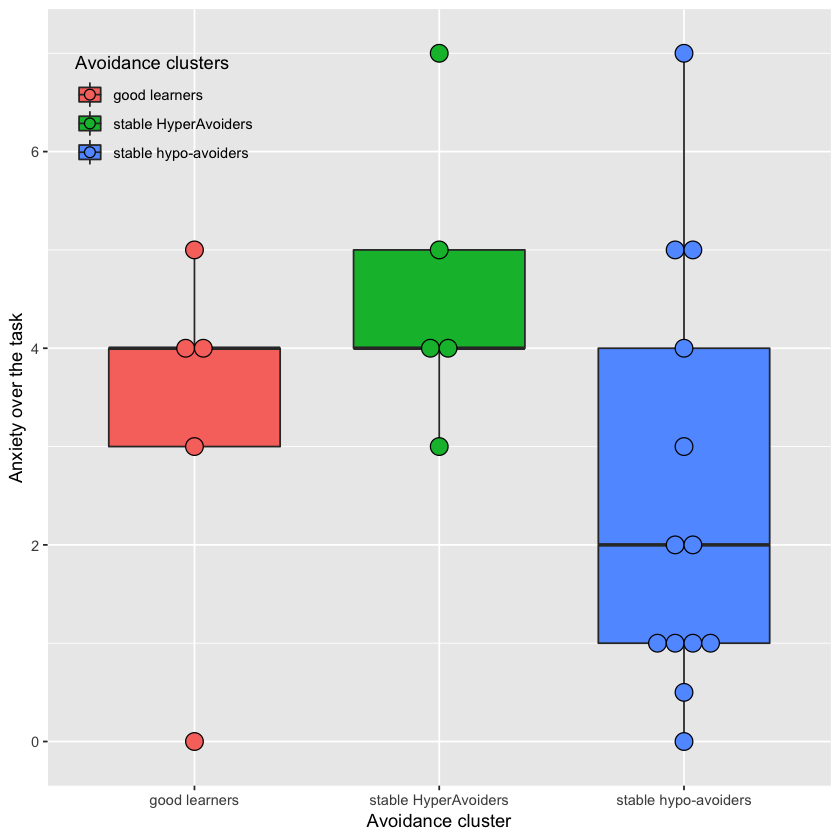

In [68]:
kruskal.test(data$VAS_Task ~ data$Avoidance_clusters)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Task,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.18, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety over the task") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Anxiety right after the task


	Kruskal-Wallis rank sum test

data:  data$VAS_Post by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.8502, df = 2, p-value = 0.08847


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

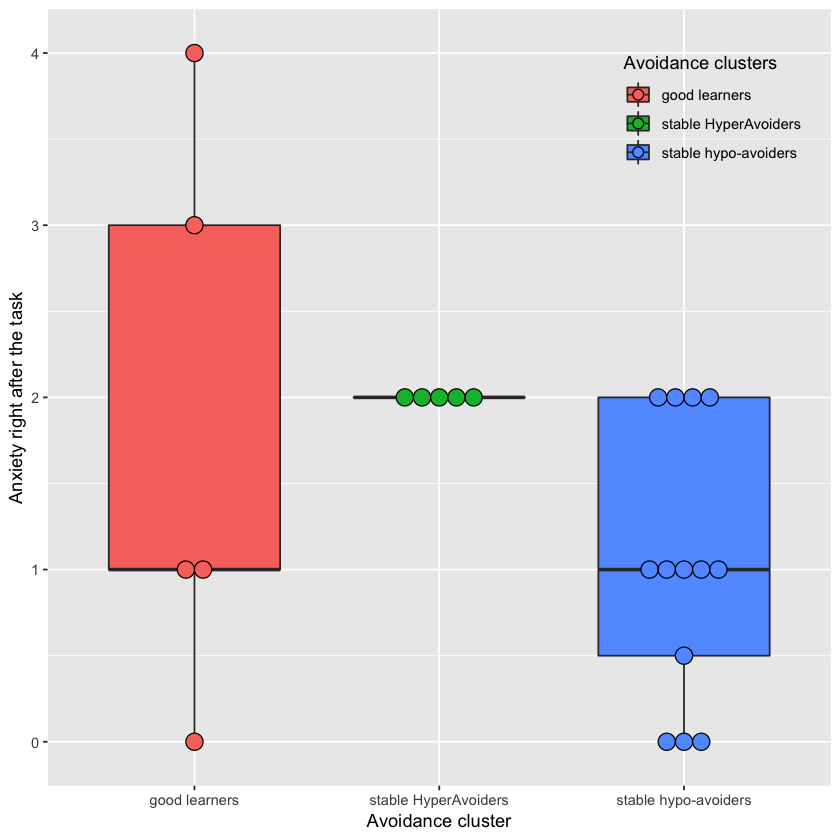

In [69]:
kruskal.test(data$VAS_Post ~ data$Avoidance_clusters)
#kruskalmc(data$VAS_Post ~ data$Avoidance_clusters)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Post,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right after the task") + 
    theme(legend.position=c(0.85,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

# COPING STYLES

## Acceptance coping style


	Kruskal-Wallis rank sum test

data:  data$Accept by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.5569, df = 2, p-value = 0.4591


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

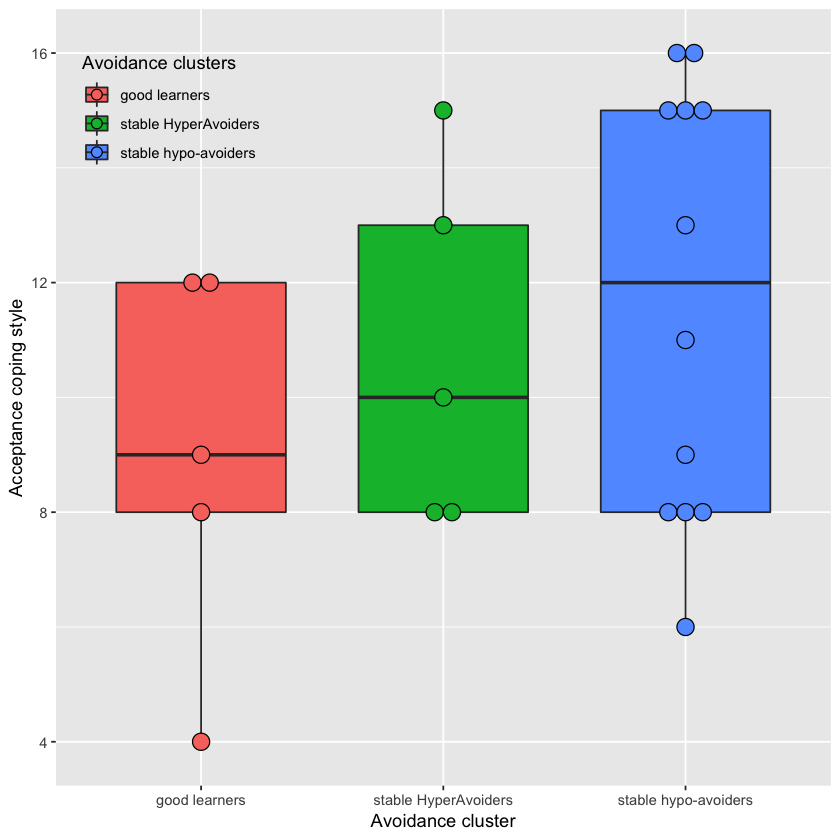

In [70]:
kruskal.test(data$Accept ~ data$Avoidance_clusters)

AcceptBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Accept,
                                    fill=Avoidance_clusters))
AcceptBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Acceptance coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Active coping style


	Kruskal-Wallis rank sum test

data:  data$Active by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.6744, df = 2, p-value = 0.01307


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

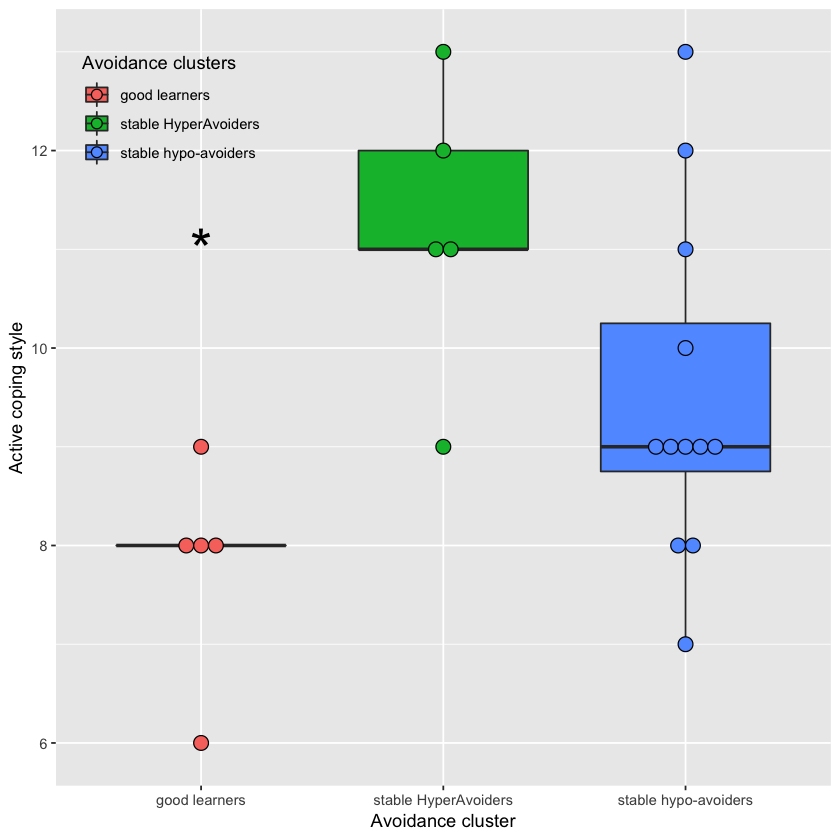

In [71]:
kruskal.test(data$Active ~ data$Avoidance_clusters)

ActiveBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active,
                                    fill=Avoidance_clusters))
ActiveBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Active coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label="*", size=12)

## Denial coping style


	Kruskal-Wallis rank sum test

data:  data$Denial by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.3096, df = 2, p-value = 0.8566


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

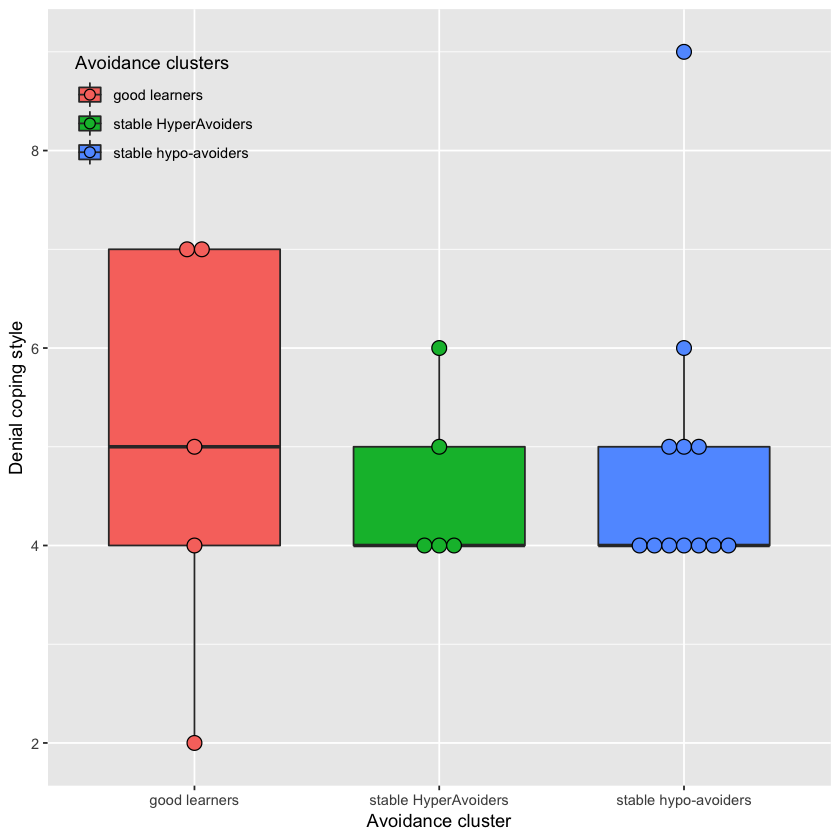

In [72]:
kruskal.test(data$Denial ~ data$Avoidance_clusters)

DenialBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Denial,
                                    fill=Avoidance_clusters))
DenialBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Denial coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Religious coping style


	Kruskal-Wallis rank sum test

data:  data$Religious by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.8738, df = 2, p-value = 0.2377


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

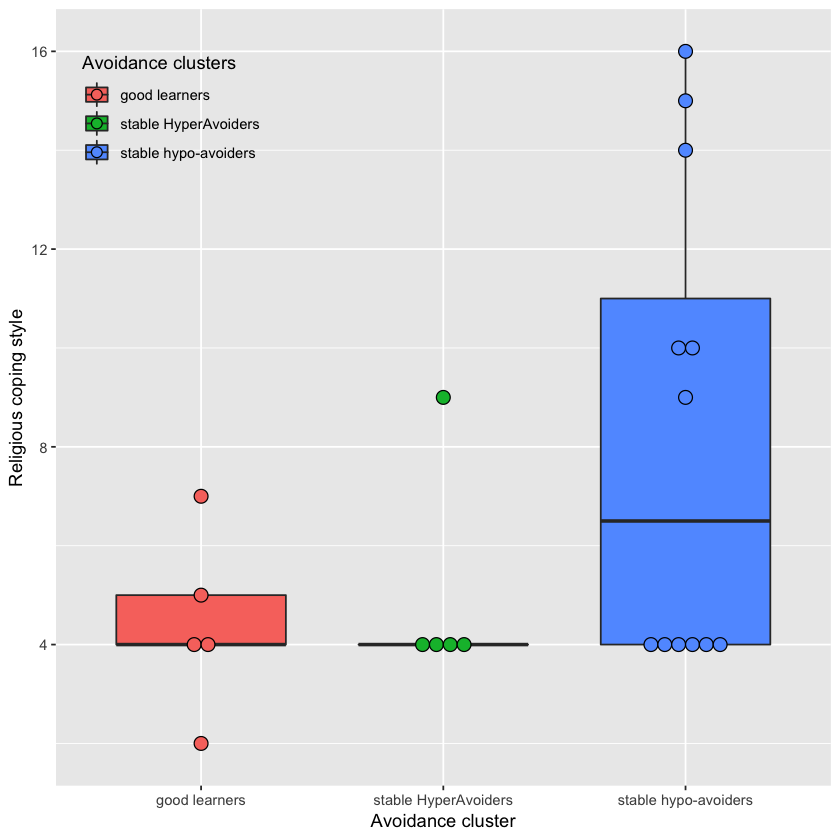

In [73]:
kruskal.test(data$Religious ~ data$Avoidance_clusters)

ReligiousBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Religious,
                                    fill=Avoidance_clusters))
ReligiousBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Religious coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Humor coping style


	Kruskal-Wallis rank sum test

data:  data$Humor by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.7249, df = 2, p-value = 0.09419


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

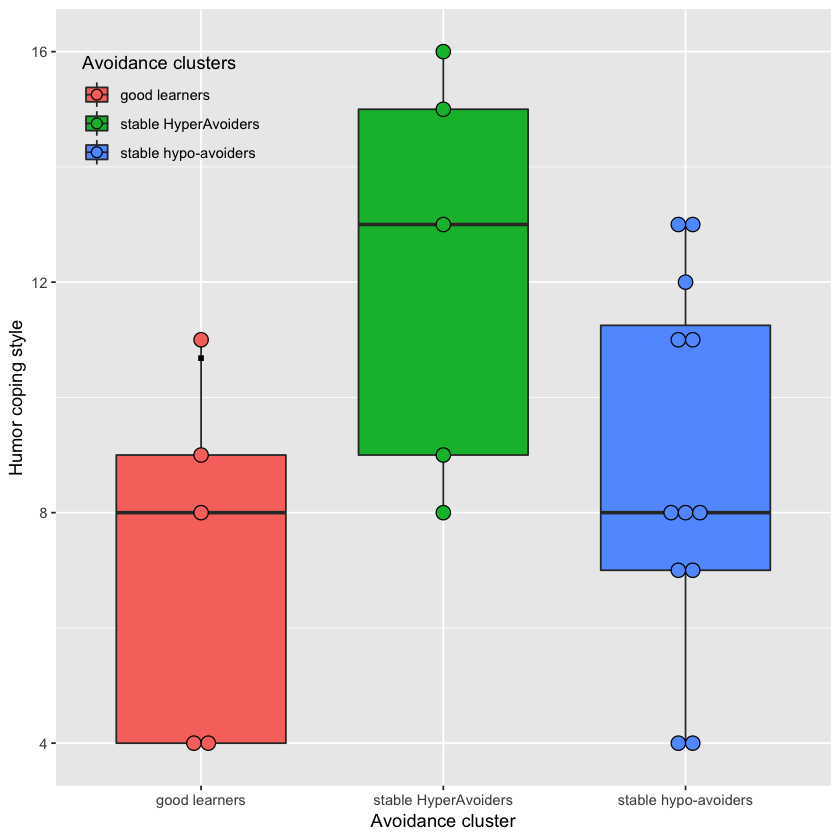

In [74]:
kruskal.test(data$Humor ~ data$Avoidance_clusters)


HumorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Humor,
                                    fill=Avoidance_clusters))
HumorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Humor coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label=".", size=12)

## Suppression of competing activities coping style


	Kruskal-Wallis rank sum test

data:  data$Suppress by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.5711, df = 2, p-value = 0.01377


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

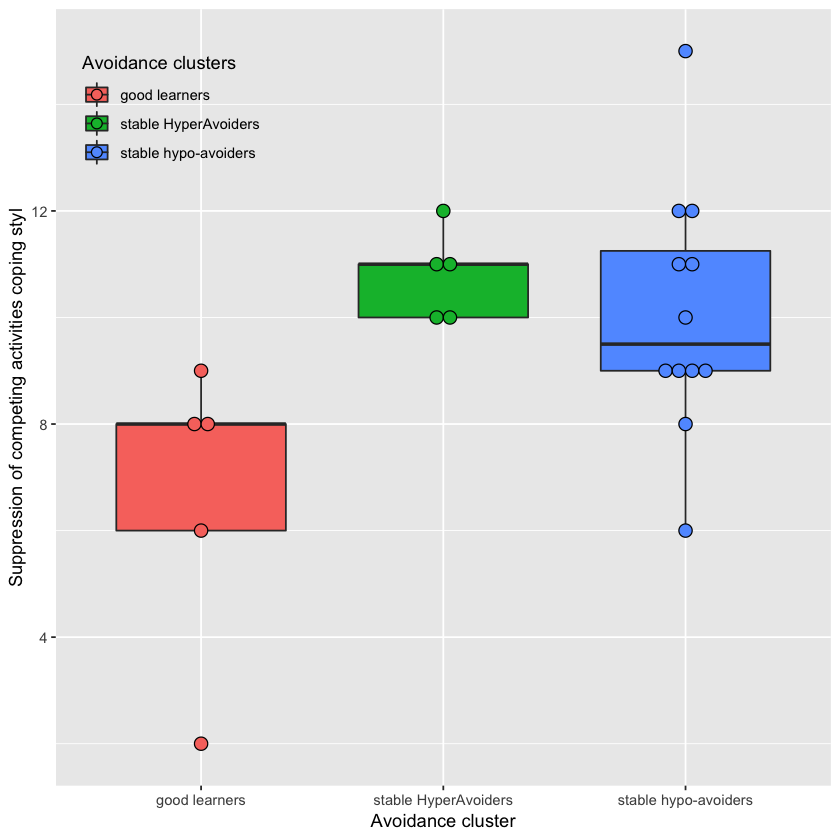

In [75]:
kruskal.test(data$Suppress ~ data$Avoidance_clusters)

SuppressBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Suppress,
                                    fill=Avoidance_clusters))
SuppressBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Suppression of competing activities coping styl") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Mental disengagement coping style


	Kruskal-Wallis rank sum test

data:  data$MentalDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.25, df = 2, p-value = 0.3247


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

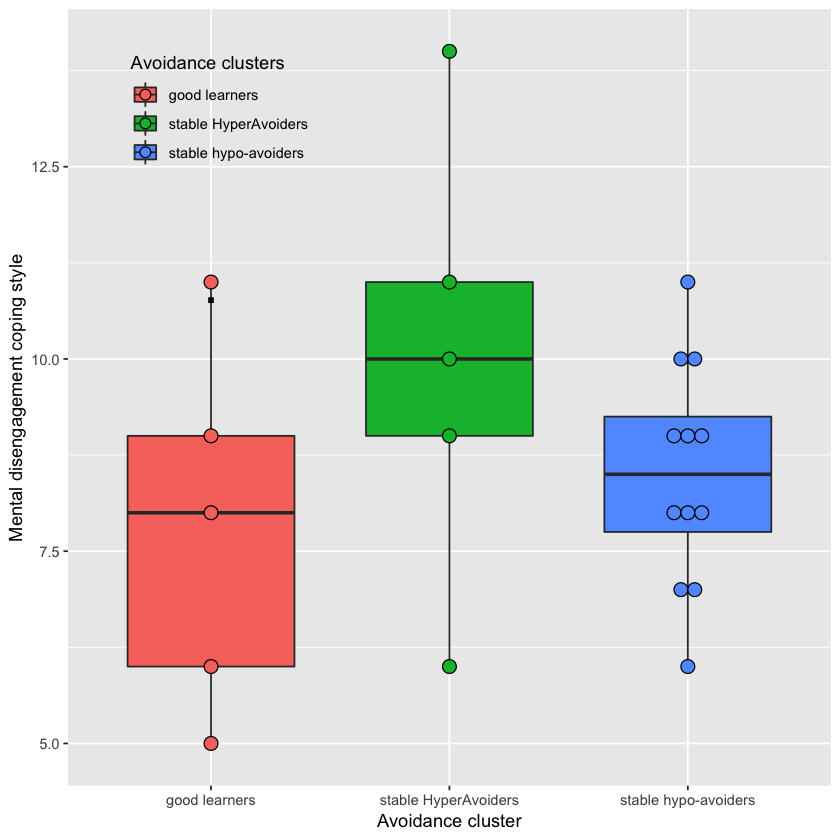

In [76]:
kruskal.test(data$MentalDis ~ data$Avoidance_clusters)

MentalDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, MentalDis,
                                    fill=Avoidance_clusters))
MentalDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.18, stackdir="center") +
    labs(x="Avoidance cluster", y="Mental disengagement coping style") + 
    theme(legend.position=c(0.2,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label=".", size=12)

## Behavioral disengagement coping style


	Kruskal-Wallis rank sum test

data:  data$BehDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.99869, df = 2, p-value = 0.6069


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

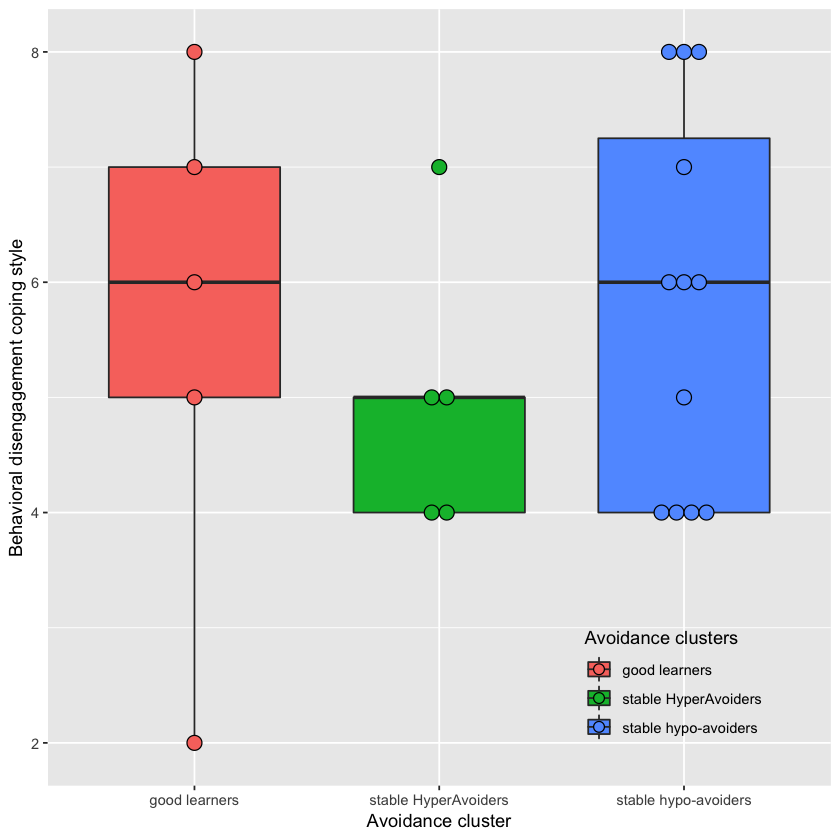

In [77]:
kruskal.test(data$BehDis ~ data$Avoidance_clusters)

BehDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BehDis,
                                    fill=Avoidance_clusters))
BehDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.13, stackdir="center") +
    labs(x="Avoidance cluster", y="Behavioral disengagement coping style") + 
    theme(legend.position=c(0.8,0.13)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Use of emotional social support coping style


	Kruskal-Wallis rank sum test

data:  data$EmoSoc by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.7491, df = 2, p-value = 0.02076


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

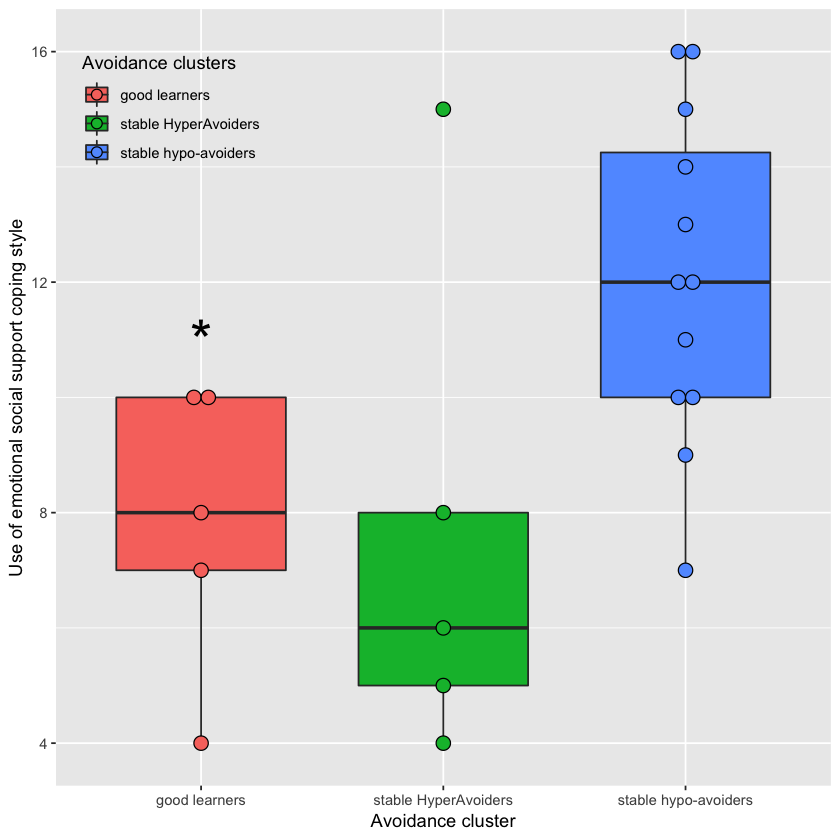

In [78]:
kruskal.test(data$EmoSoc ~ data$Avoidance_clusters)

EmoSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, EmoSoc,
                                    fill=Avoidance_clusters))
EmoSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Use of emotional social support coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label="*", size=12)

## Substance use coping style


	Kruskal-Wallis rank sum test

data:  data$Subst by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.55839, df = 2, p-value = 0.7564


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

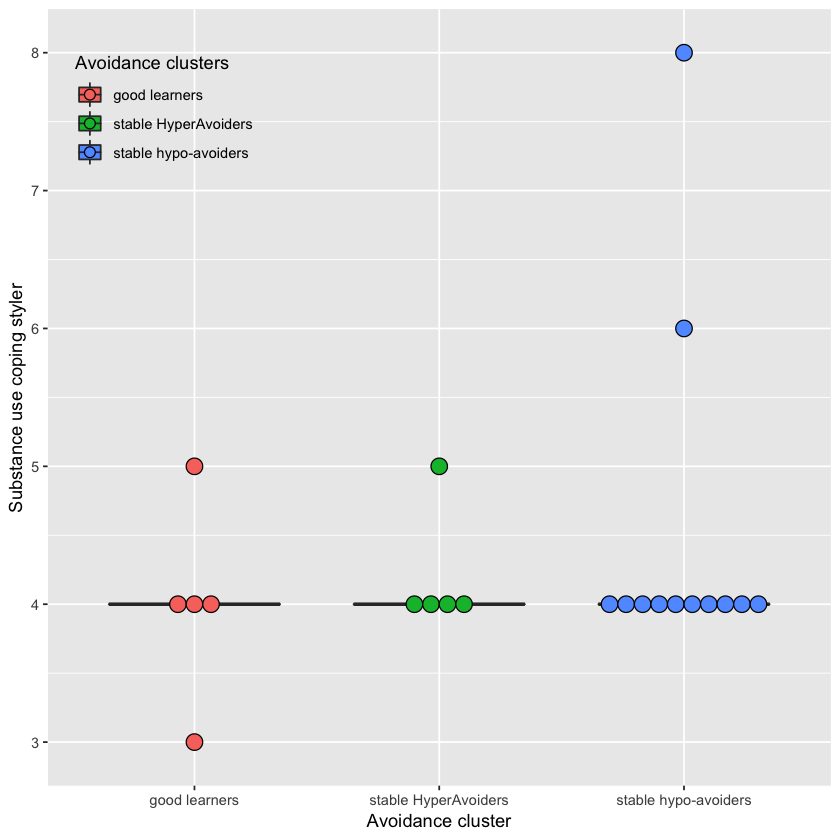

In [79]:
kruskal.test(data$Subst ~ data$Avoidance_clusters)

SubstBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Subst,
                                    fill=Avoidance_clusters))
SubstBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.12, stackdir="center") +
    labs(x="Avoidance cluster", y="Substance use coping styler") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Planning coping style


	Kruskal-Wallis rank sum test

data:  data$Plan by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.6351, df = 2, p-value = 0.01333


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

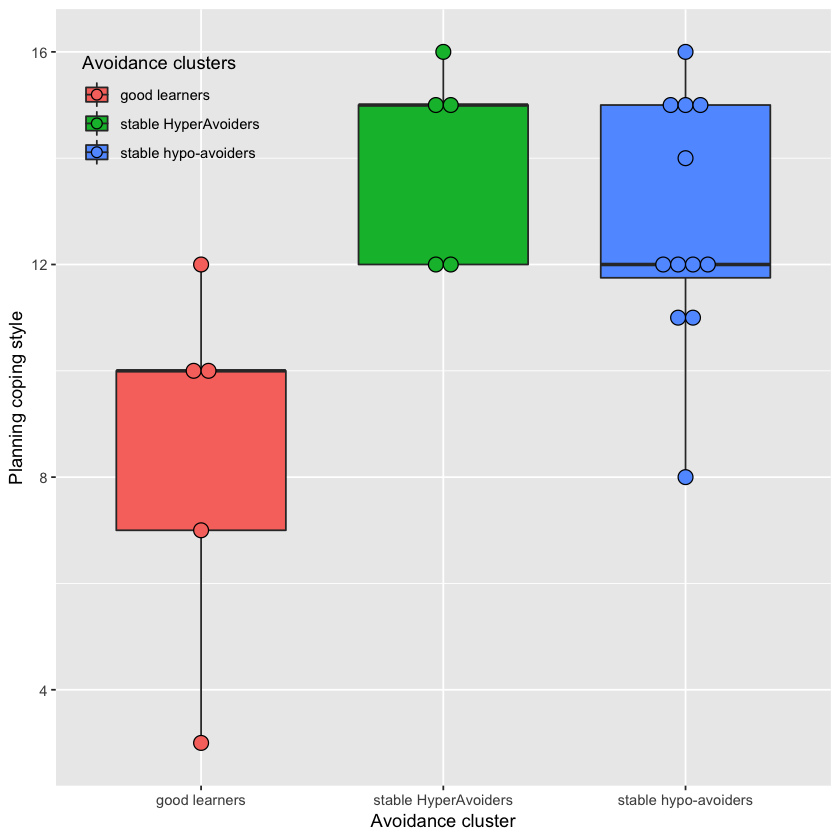

In [80]:
kruskal.test(data$Plan ~ data$Avoidance_clusters)

PlanBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Plan,
                                    fill=Avoidance_clusters))
PlanBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Planning coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## PosTot

In [ ]:
kruskal.test(data$PosTot ~ data$Avoidance_clusters)

PosTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosTot,
                                    fill=Avoidance_clusters))
PosTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center") +
    labs(x="Avoidance cluster", y="PosTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item


	Kruskal-Wallis rank sum test

data:  data$PosTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.8296, df = 2, p-value = 0.01994


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

## NegTot

In [ ]:
kruskal.test(data$NegTot ~ data$Avoidance_clusters)

NegTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, NegTot,
                                    fill=Avoidance_clusters))
NegTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.87, stackdir="center") +
    labs(x="Avoidance cluster", y="NegTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

'STAI_S' 'STAI_T' 'BIS' 'AI' 'AllAR' 'STAIS_Group' 'BIS_Group' 'ID2' 'STAIT_Groups'

'BISMedian_Group'   'ShockVolts' 'MeanBP_Avoid' 'Mean_BP_Motor' 'RT_ALL_Avoid' 'RT_ALL_Motor' 'RT_Early_Avoid' 'RT_Late_Avoid' 'RT_Early_Motor' 'RT_Late_Motor' 'Age' 'Ancestry' 'Sex' 'Marital_Status' 'Student' 'Education' 'Yrs_ed' 'WorkingNow'


'VAS_Pre' 'VAS_Post' 'VAS_Task' 'Change_group' 'SumChangePerf'  'PERF_LEARN_GROUP' 'AVG_1ST6' 'AVG_LAST6' 'DIFF'  'Chg2Grp' 'PosRein_Sub' 'Vent_Sub' 'InsSoc_Sub' 'Res_Sub' 'Active_Sub' 'Passive_Sub' 



COPE inventory
“the active coping, planning, suppression, restraint, instrumental social support, emotional social support, positive reinterpretation, acceptance, religion, venting, denial, behavioral disengagement, mental disengagement, and substance use subscales of the COPE”



Barrat’s Impulsivity Scale
'“the attention, motor, self-control, cognitive coping, and perseverance subscales, as well as the total score for the BIS”


'BIS_Total' 'BIS_Attention' 'BIS_Motor' 'BIS_SlfCtl' 'BIS_CogCpx' 'BIS_Prsvr' 'BIS_CogIns' 'BIS_AttImp' 'BIS_MtrImp' 'BIS_NPlImp


Intrinsic Motivation Inventory
“the interest/enjoyment, perceived competence, perceived choice,
and pressure/tension subscales, as well as the total score for the IMI”

'IMITotal' 'IMIInterest' 'IMICompetence' 'IMIEffort' 'IMIPressure' 'IMIRelated'